In [3]:
import pickle
import os
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from scipy.stats import spearmanr
from scipy.stats import kendalltau

os.chdir('/data/yosef2/users/chenling/HarmonizationSCANVI')
save_path = "../symsim_scVI/symsim_result/DE/"


In [4]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline

In [5]:
nevf = pd.read_csv(os.path.join(save_path, "n_evf.csv"),
                             sep=",", index_col=0, header=0)
nevf=np.asarray(nevf['x'])

# 12
```python
>>> print(eval_bayes_factor(log_FC[nevf==0],bayes_AB[nevf==0]))
(0.809239998952084, 0.8845029239766082, 0.791238788899506, 0.6130982550339206)
>>> print(eval_bayes_factor(log_FC[nevf==1],bayes_AB[nevf==1]))
(0.8037576249752033, 0.8525438920644406, 0.9008319906790959, 0.7380967578902946)
>>> print(eval_bayes_factor(log_FC[nevf==2],bayes_AB[nevf==2]))
(0.8372799162546665, 0.8414629330211121, 0.9335341066766897, 0.788121850640592)
>>> print(eval_bayes_factor(log_FC[nevf==3],bayes_AB[nevf==3]))
(0.8189318299190911, 0.8440470366228683, 0.9481718512321268, 0.8076643980166641)
>>> print(eval_bayes_factor(log_FC[nevf==4],bayes_AB[nevf==4]))
(0.8023, 0.8692886061307113, 0.9514465601537797, 0.8138689622190338)
```

# 45
```python
>>> print(eval_bayes_factor(log_FC[nevf==0],bayes_AB[nevf==0]))
(0.3740634251133059, 0.3336111111111111, 0.36255425264480134, 0.24867830905960295)
>>> print(eval_bayes_factor(log_FC[nevf==1],bayes_AB[nevf==1]))
(0.48123899647887325, 0.4741630433927996, 0.3996169092273194, 0.275151882562943)
>>> print(eval_bayes_factor(log_FC[nevf==2],bayes_AB[nevf==2]))
(0.48289043318871283, 0.4965200341956586, 0.5466777348675441, 0.38308660382369714)
>>> print(eval_bayes_factor(log_FC[nevf==3],bayes_AB[nevf==3]))
(0.5262265450163539, 0.5532176055353648, 0.5637874804329784, 0.40056002215084113)
>>> print(eval_bayes_factor(log_FC[nevf==4],bayes_AB[nevf==4]))
(0.5761000000000002, 0.5904665509928668, 0.5715153313308484, 0.40740386641338716)
```

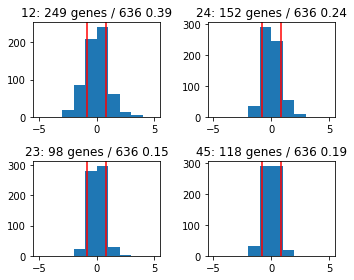

In [6]:
theoretical_FC = pd.read_csv(os.path.join(save_path, "theoreticalFC.csv"),
                             sep=",", index_col=0, header=0)

plt.figure(figsize=(5,4))
for i,key in enumerate(['12','24','23','45']):
    plt.subplot(2,2,i+1)
    log_FC = theoretical_FC[key][nevf==3]
    plt.hist(log_FC,range=(-5,5))
    detected_genes = np.sum(np.abs(log_FC) >= 0.8)
    plt.title("%s: %i genes / %i %.2f"%(key,detected_genes,log_FC.shape[0],detected_genes/log_FC.shape[0]))
#     plt.title(key)
    plt.axvline(x=-0.8,color='red')
    plt.axvline(x=0.8,color='red')
    plt.tight_layout()

# plt.savefig(save_path+'DE_simulation.0.logFC.pdf')
plt.show()

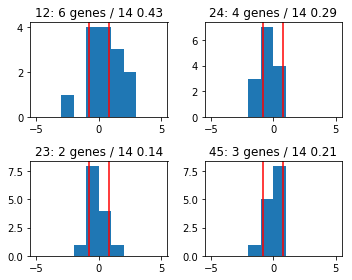

In [7]:
theoretical_FC = pd.read_csv(os.path.join(save_path, "theoreticalFC.csv"),
                             sep=",", index_col=0, header=0)

plt.figure(figsize=(5,4))
for i,key in enumerate(['12','24','23','45']):
    plt.subplot(2,2,i+1)
    log_FC = theoretical_FC[key][nevf==5]
    plt.hist(log_FC,range=(-5,5))
    detected_genes = np.sum(np.abs(log_FC) >= 0.8)
    plt.title("%s: %i genes / %i %.2f"%(key,detected_genes,log_FC.shape[0],detected_genes/log_FC.shape[0]))
#     plt.title(key)
    plt.axvline(x=-0.8,color='red')
    plt.axvline(x=0.8,color='red')
    plt.tight_layout()

plt.savefig(save_path+'DE_simulation.5.logFC.pdf')

In [8]:
def eval_de(log_fold_change, logFC):
    """
    :param log_fold_change: groundtruth
    :param bayes_f: non-log Bayes Factor
    :return:
    """
    auc_1 = roc_auc_score(np.abs(log_fold_change) >= 0.6, np.abs(logFC))
    auc_2 = roc_auc_score(np.abs(log_fold_change) >= 0.8, np.abs(logFC))
    spear = spearmanr(logFC, log_fold_change)
    kend = kendalltau(logFC, log_fold_change)
    return auc_1, auc_2, spear[0], kend[0]


In [14]:
scvires={'bayes_A':{},'bayes_B':{},'bayes_AB':{},'bayes_scanviAB':{}}

for type in ['bayes_A','bayes_B','bayes_AB','bayes_scanviAB']:
    scvires[type] = {'12':{},'23':{},'24':{},'45':{}}
    for comparison in ['12','23','24','45']:
        scvires[type][comparison] = {'R1':[],'R2':[],'S':[],'K':[]}
        for rep in range(8):
            X = pd.read_csv(os.path.join(save_path,'result.nb.%s.%i.csv'%(comparison,rep+1)))
            X = X[type]
            X = np.log(X + 1e-8) - np.log(1 - X + 1e-8)
            stats = eval_de(theoretical_FC[comparison], X)
            for i,x in enumerate(['R1','R2','S','K']):
                scvires[type][comparison][x].append(stats[i])


In [10]:
# for type in scvires.keys():
#     for comparison in scvires[type].keys():
#         for res_type in scvires[type][comparison].keys():
#             print("results_scVI %s %s %s"%(type, comparison, res_type), np.mean(scvires[type][comparison][res_type]),
#                   "+-", np.std(scvires[type][comparison][res_type]))

In [20]:
edgeR_res = {'12':{},'23':{},'24':{},'45':{}}
for comparison in ['12','23','24','45']:
    edgeR_res[comparison] = {'A': {}, 'B': {}, 'AB': {}}
    for batch in ['A', 'B', 'AB']:
        edgeR_res[comparison][batch] = {'R1':[],'R2':[],'S':[],'K':[]}
        for rep in range(10):
            X = pd.read_csv(os.path.join(save_path, 'EdgeR/SIM.%s.%i.0.00.%s.edgeR.csv') % (batch,(rep+1), comparison))
            stats = eval_de(theoretical_FC[comparison], X['logFC'])
            for i,x in enumerate(['R1','R2','S','K']):
                edgeR_res[comparison][batch][x].append(stats[i])


In [11]:

# for type in edgeR_res.keys():
#     for comparison in edgeR_res[type].keys():
#         for batch in edgeR_res[type][comparison].keys():
#             for res_type in edgeR_res[type][comparison][batch].keys():
#                 print("results_EdgeR%s %s %s %s"%(type, comparison, batch, res_type), np.mean(edgeR_res[type][comparison][batch][res_type]),
#                       "+-", np.std(edgeR_res[type][comparison][batch][res_type]))


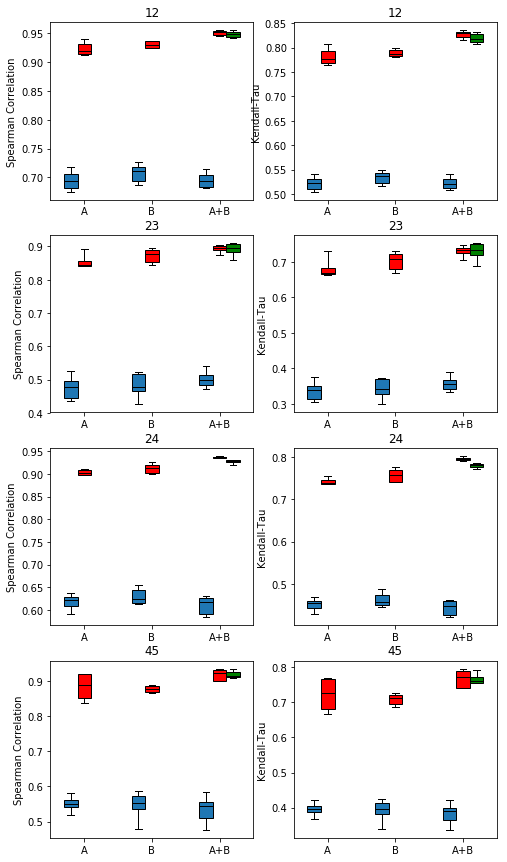

In [22]:
# measure_names = ['AUC1','AUC2','Spearman','Kendall']
measure_names = ['Spearman Correlation','Kendall-Tau']
plt.figure(figsize=(8, 15))
# for name, measure in enumerate(['R1', 'R2', 'S', 'K']): 
for name, measure in enumerate([ 'S', 'K']): 
    for row,comparison in enumerate(['12','23','24','45']):
        props = dict(widths=0.2, patch_artist=True, medianprops=dict(color="black"), whis=[5, 95], sym="")

        #AUC CD$CD*
        ax = plt.subplot(4, 2, row*2+name+1)
        ax.set_ylabel(measure_names[name])
#         ax.set_ylabel(comparison)
        plt.title(comparison)
        bp1 = ax.boxplot([np.abs(edgeR_res[comparison][x][measure]) for x in ['A','B','AB'] ], positions=[0, 1, 2], **props)
        bp2 = ax.boxplot([scvires['bayes_scanviAB'][comparison][measure]], positions=[2.4], **props)
        bp3 = ax.boxplot([scvires[x][comparison][measure] for x in ['bayes_A','bayes_B','bayes_AB']], positions=[0.2, 1.2, 2.2], **props)

        for patch in bp3['boxes']:
            patch.set_facecolor('red')
        for patch in bp2['boxes']:
            patch.set_facecolor('green')

        ax.set_xticklabels(['A','B', 'A+B'])
#         ax.legend([bp1["boxes"][0], bp2["boxes"][0], bp3["boxes"][0]], ['edgeR', 'SCANVI', 'scVI'])
plt.savefig('DE_NB.pdf')


In [182]:
np.unique(truelab[2000:4000],return_counts=True)

(array([1., 2.]), array([1988,   12]))

In [181]:
np.unique(scvi_pred[2000:4000],return_counts=True)

(array([0, 1, 2, 3, 4]), array([  22, 1788,  116,   35,   39]))

In [185]:
# compute average classification accuracy 
truelab = np.genfromtxt(save_path + 'DE.obsv.labels.csv',)
batch = np.genfromtxt(save_path + 'DE.obsv.batch.csv',)
scvi = []
scanvi=[]
for i in range(50):
    pred = pd.read_csv(save_path + 'pred_labels.%i.csv'%(i+1))
    scvi_pred = np.asarray(pred['scVI'])
    scvi.append([np.mean(scvi_pred==truelab),
        np.mean(scvi_pred[batch==0]==truelab[batch==0]),
        np.mean(scvi_pred[batch==1]==truelab[batch==1])])
    scanvi_pred = np.asarray(pred['scANVI'])
    scanvi.append([np.mean(scanvi_pred==truelab),
        np.mean(scanvi_pred[batch==0]==truelab[batch==0]),
        np.mean(scanvi_pred[batch==1]==truelab[batch==1])])



In [186]:
mean = np.asarray(scvi).mean(axis=0)
std = np.asarray(scvi).std(axis=0)
for i in range(3):
    print('average accuracy = %.3f±%.3f' % (mean[i],std[i]))

average accuracy = 0.896±0.002
average accuracy = 0.907±0.002
average accuracy = 0.886±0.002


In [187]:
mean = np.asarray(scanvi).mean(axis=0)
std = np.asarray(scanvi).std(axis=0)
for i in range(3):
    print('average accuracy = %.3f±%.3f' % (mean[i],std[i]))

average accuracy = 0.905±0.001
average accuracy = 0.904±0.001
average accuracy = 0.905±0.002


In [190]:
# compute average classification accuracy 
truelab = np.genfromtxt(save_path + 'DE.obsv.labels.csv',)
batch = np.genfromtxt(save_path + 'DE.obsv.batch.csv',)
scvi = []
scanvi=[]
for i in range(36):
    pred = pd.read_csv(save_path + 'pred_labels.%i.mis0.01.csv'%(i+1))
    scvi_pred = np.asarray(pred['scVI'])
    scvi.append([np.mean(scvi_pred==truelab),
        np.mean(scvi_pred[batch==0]==truelab[batch==0]),
        np.mean(scvi_pred[batch==1]==truelab[batch==1])])
    scanvi_pred = np.asarray(pred['scANVI'])
    scanvi.append([np.mean(scanvi_pred==truelab),
        np.mean(scanvi_pred[batch==0]==truelab[batch==0]),
        np.mean(scanvi_pred[batch==1]==truelab[batch==1])])



In [191]:
mean = np.asarray(scvi).mean(axis=0)
std = np.asarray(scvi).std(axis=0)
for i in range(3):
    print('average accuracy = %.3f±%.3f' % (mean[i],std[i]))

average accuracy = 0.718±0.028
average accuracy = 0.795±0.023
average accuracy = 0.643±0.038


In [192]:
mean = np.asarray(scanvi).mean(axis=0)
std = np.asarray(scanvi).std(axis=0)
for i in range(3):
    print('average accuracy = %.3f±%.3f' % (mean[i],std[i]))

average accuracy = 0.885±0.008
average accuracy = 0.888±0.008
average accuracy = 0.881±0.011
